# Problema dell'iris


## Descrizione del problema 

This is perhaps the best known database to be found in the pattern recognition literature. Fisher's paper is a classic in the field and is referenced frequently to this day. (See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, spchadwick '@' espeedaz.net ). The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features.


Attribute Information:

1. sepal length in cm
2. sepal width in cm
3. petal length in cm
4. petal width in cm
5. class:
-- Iris Setosa
-- Iris Versicolour
-- Iris Virginica

## Importazioen delle librerie e dei file 

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
import pandas as pd

import scipy.stats as stats

In [2]:
DATA_PATH='./data/iris_dataset.csv'
data = pd.read_csv(DATA_PATH, sep=",")
data.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,classe
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Azioni sul dataset

In [3]:
print("Ci sono NaN Values: {}".
    format(data.isnull().any().any()
))

Ci sono NaN Values: True


>vedo che ci sono valori nulli

In [4]:
#sostituisco i valori nulli
from pandas.api.types import is_numeric_dtype

data=data.apply(lambda x: x.fillna(x.median) if is_numeric_dtype else x.fillna(x.mode().iloc[0]))

data.petal_width_cm
print("Elementi in petal width cm:{}".format(sorted(data.petal_width_cm.unique(),reverse=True)))

TypeError: '<' not supported between instances of 'method' and 'float'

In [ ]:

data.describe(include='all')

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,classe
count,150.000000,150.000000,150.000000,150.0,150
unique,NaN,NaN,NaN,23.0,5
top,NaN,NaN,NaN,0.2,Iris-virginica
freq,NaN,NaN,NaN,24.0,50
mean,5.644627,3.054667,3.758667,NaN,NaN
std,1.312781,0.433123,1.764420,NaN,NaN
min,0.055000,2.000000,1.000000,NaN,NaN
25%,5.100000,2.800000,1.600000,NaN,NaN
50%,5.700000,3.000000,4.350000,NaN,NaN
75%,6.400000,3.300000,5.100000,NaN,NaN


>Dalla descrizione vedo che ho 5 classi uniche, due in più del dovuto

In [ ]:
#trovo quali sono le classi sbagliate
data.classe.unique()

array(['Iris-setosa', 'Iris-setossa', 'Iris-versicolor', 'versicolor',
       'Iris-virginica'], dtype=object)

In [ ]:
#Correggo le classi sbagliate
data = data.replace('Iris-setossa','Iris-setosa')
data = data.replace('versicolor', 'Iris-versicolor')

#controllo che abbia fatto effetto
data.classe.unique()
#data.describe(include='all')

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

>ora ho le classi come dovrebbero essere

### Cerco eventuali outliers

TypeError: Horizontal orientation requires numeric `x` variable.

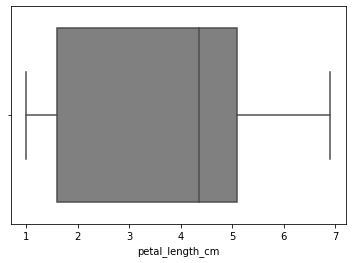

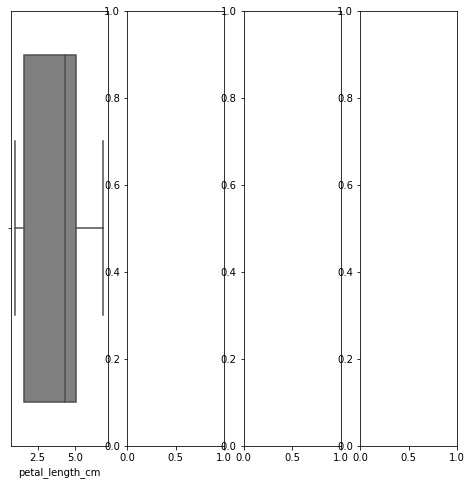

In [ ]:
sns.boxplot(x=data.petal_length_cm, color='#808080')
fig, axes = plt.subplots(1, 4, figsize=(8,8))

sns.boxplot(x=data.petal_length_cm, color='#808080', ax=axes[0])
sns.boxplot(x=data.petal_width_cm, color='#0033cc', ax=axes[1])
sns.boxplot(x=data.sepal_length_cm, color='#808080', ax=axes[2])
sns.boxplot(x=data.sepal_width_cm, color='#0033cc', ax=axes[3])


>notoche ci sono outliers nei primi due 

TypeError: Neither the `x` nor `y` variable appears to be numeric.

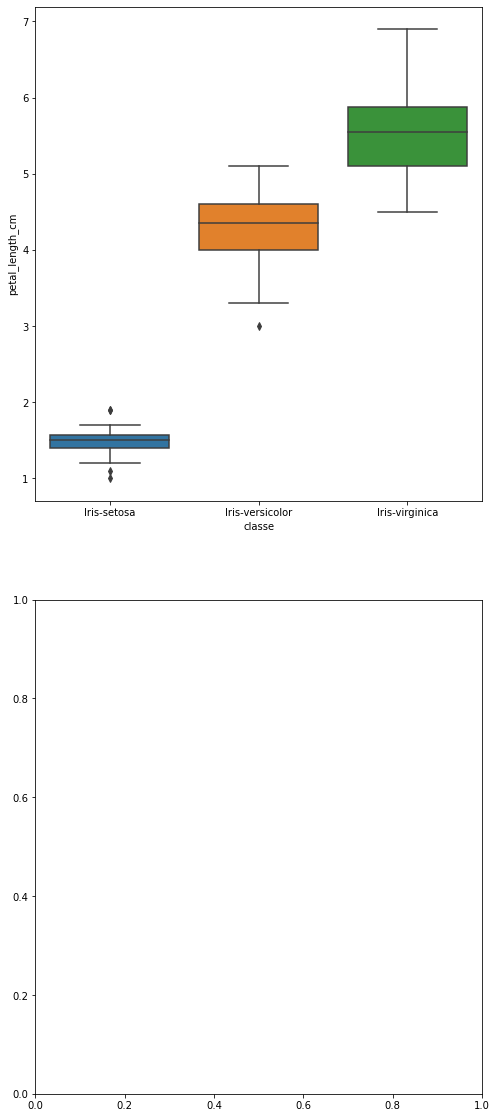

In [ ]:
fig,axs=plt.subplots(2,1,figsize=(8,20))
sns.boxplot(x=data.classe,y=data.petal_length_cm,ax=axs[0])
sns.boxplot(x=data.classe,y=data.petal_width_cm,ax=axs[1])

In [ ]:
stats.mstats.winsorize(data.sepal_length_cm, limits=0.05, inplace=True)
stats.mstats.winsorize(data.sepal_width_cm, limits=0.05, inplace=True)

masked_array(data=[3.5, 3. , 3.2, 3.1, 3.6, 3.8, 3.4, 3.4, 2.9, 3.1, 3.7,
                   3.4, 3. , 3. , 3.8, 3.8, 3.8, 3.5, 3.8, 3.8, 3.4, 3.7,
                   3.6, 3.3, 3.4, 3. , 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 3.8,
                   3.8, 3.1, 3.2, 3.5, 3.1, 3. , 3.4, 3.5, 2.3, 3.2, 3.5,
                   3.8, 3. , 3.8, 3.2, 3.7, 3.3, 3.2, 3.2, 3.1, 2.3, 2.8,
                   2.8, 3.3, 2.4, 2.9, 2.7, 2.3, 3. , 2.3, 2.9, 2.9, 3.1,
                   3. , 2.7, 2.3, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3. , 2.8,
                   3. , 2.9, 2.6, 2.4, 2.4, 2.7, 2.8, 3. , 3.4, 3.1, 2.3,
                   3. , 2.5, 2.6, 3. , 2.6, 2.3, 2.7, 3. , 2.9, 2.9, 2.5,
                   2.8, 3.3, 2.7, 3. , 2.9, 3. , 3. , 2.5, 2.9, 2.5, 3.6,
                   3.2, 2.7, 3. , 2.5, 2.8, 3.2, 3. , 3.8, 2.6, 2.3, 3.2,
                   2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3. , 2.8, 3. , 2.8, 3.8,
                   2.8, 2.8, 2.6, 3. , 3.4, 3.1, 3. , 3.1, 3.1, 3.1, 2.7,
                   3.2, 3.3, 3. , 2.5,

c:\Users\lucar\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\lucar\miniconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
c:\Users\lucar\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\lucar\miniconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_v

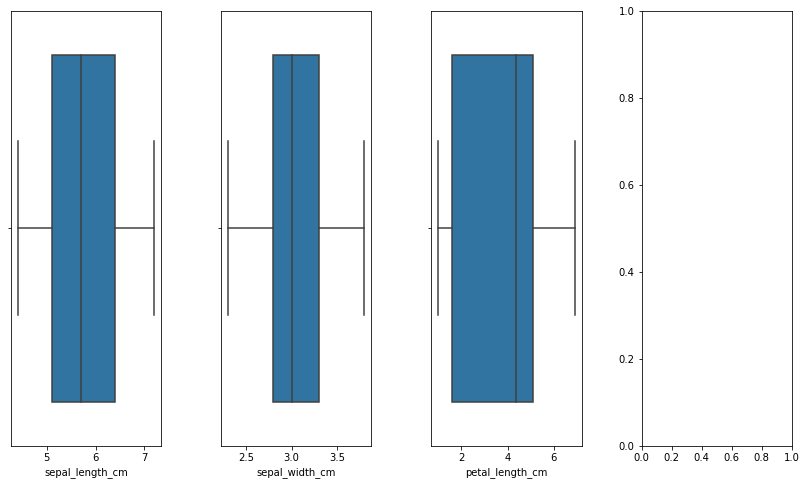

In [ ]:
#voglio un sublot con 1 riga e 3 colonne 
fig , axes = plt.subplots(1,4, figsize=(14,8))


sns.boxplot(data["sepal_length_cm"], ax=axes[0], orient ='v')
sns.boxplot(data["sepal_width_cm"] , ax= axes[1], orient='v')
sns.boxplot(data["petal_length_cm"] , ax=axes[2], orient='v')
#sns.boxplot(data["petal_width_cm"] , ax=axes[3])
plt.subplots_adjust(hspace=.33, wspace=.4)

> Gli Outliers sono stati risolti quindi posso fermarmi qua


## Costruzione del modello pedittivo

In [ ]:
from sklearn.metrics import SCORERS
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import explained_variance_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
#from sklearn.externals import joblib

Ora trasformo il dato testuale in numerico

In [ ]:
data.classe = data.classe.map(lambda x: 1 if x=='Iris-setosa'  else (-1 if x=='Iris-versicolor' else 0))
data

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,classe
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,2.3,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


ora devo separare il trainig set da il test set


In [ ]:
#estraggo il features dataset
X=data.iloc[:,:-1]
X.head()
#mi basta estrarre tuttotranne ultima riga essendo il dato da predirre l'ultima colonnadel database

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
#estraggo il vettore target
y=data.classe
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: classe, Length: 150, dtype: int64


In [ ]:
"""
General function used to assess the quality of predictions
in terms of two scores: accuracy and ROC AUC (Area Under the ROC Curve)
"""
def evaluate(true_values, predicted_values):
    # Classification Accuracy
    print("Accuracy = {:.3f}".
          format(accuracy_score(true_values, predicted_values)))
    # Explained variance score: 1 is perfect prediction
    print("Area Under the ROC Curve (ROC AUC) = {:.3f}".
          format(roc_auc_score(true_values, predicted_values)))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=73)
                                                    
                                                    
k_fold=StratifiedKFold(n_splits=10,shuffle=True,random_state=30)

In [ ]:
models_and_hyperparams = {'LogisticRegression': (LogisticRegression(solver = "liblinear"),
                                                 {'C': [0.01, 0.05, 0.1, 0.5, 1, 2],
                                                 'penalty': ['l1', 'l2']}
                                                )
                         }

# Get the only model available
model = models_and_hyperparams['LogisticRegression'][0]

# Get the hyperparameters for that model
hyperparams = models_and_hyperparams['LogisticRegression'][1]

gs = GridSearchCV(estimator=model, param_grid=hyperparams, cv=k_fold, 
                  scoring='accuracy',
                  verbose=True,
                 return_train_score=True)
gs.fit(X_train, y_train)
pd.DataFrame(gs.cv_results_)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


c:\Users\lucar\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\lucar\miniconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\lucar\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1508, in fit
    X, y = self._validate_data(
  File "c:\Users\lucar\miniconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "c:\Users\lucar\min

TypeError: float() argument must be a string or a number, not 'method'

In [ ]:
# Model evaluation using cross-validation
print("***** Evaluate Average Performance on Training Set *****")
print("Avg. Training Set Accuracy = {:.3f}".format(np.mean(cv['train_accuracy'])))
print("Avg. Training Set ROC AUC = {:.3f}".format(np.mean(cv['train_roc_auc'])))
print()
print("***** Evaluate Average Performance on Cross-Validation Set *****")
print("Avg. Test Set Accuracy = {:.3f}".format(np.mean(cv['test_accuracy'])))
print("Avg. Test Set ROC AUC = {:.3f}".format(np.mean(cv['test_roc_auc'])))

***** Evaluate Average Performance on Training Set *****
Avg. Training Set Accuracy = nan
Avg. Training Set ROC AUC = nan

***** Evaluate Average Performance on Cross-Validation Set *****
Avg. Test Set Accuracy = nan
Avg. Test Set ROC AUC = nan
